### Review of Classification and Deepening of Statistical Foundations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from statsmodels.discrete.discrete_model import Logit

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [17]:
possums = pd.read_csv('possum.csv')

In [18]:
possums.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [19]:
possums = possums.dropna()

In [20]:
possums['sex'] = np.where(possums['sex'] == 'm', 0, 1)
possums['pop'] = np.where(possums['pop'] == 'Vic', 0, 1)

In [21]:
possums.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,0,0,8.0,94.1,60.4,89.0,36.0
1,1,0,1,6.0,92.5,57.6,91.5,36.5
2,1,0,1,6.0,94.0,60.0,95.5,39.0
3,1,0,1,6.0,93.2,57.1,92.0,38.0
4,1,0,1,2.0,91.5,56.3,85.5,36.0


In [22]:
possums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     102 non-null    int64  
 1   pop      102 non-null    int64  
 2   sex      102 non-null    int64  
 3   age      102 non-null    float64
 4   head_l   102 non-null    float64
 5   skull_w  102 non-null    float64
 6   total_l  102 non-null    float64
 7   tail_l   102 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 7.2 KB


In [23]:
X = possums.iloc[:, 2:]
y = possums['pop']

<AxesSubplot:xlabel='pop', ylabel='count'>

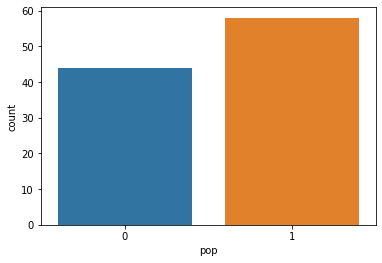

In [24]:
sns.countplot(y)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
clf.fit(X, y)

LogisticRegression()

In [28]:
clf.score(X, y)

0.8529411764705882

In [30]:
pd.DataFrame({'features': X.columns, 'coefs': clf.coef_[0]})

,features,coefs
0,sex,-0.914433
1,age,-0.123853
2,head_l,0.179978
3,skull_w,0.161453
4,total_l,-0.647431
5,tail_l,1.709872


In [31]:
logit = Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.377954
         Iterations 7


In [32]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    pop   No. Observations:                  102
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.4472
Time:                        20:16:28   Log-Likelihood:                -38.551
converged:                       True   LL-Null:                       -69.737
Covariance Type:            nonrobust   LLR p-value:                 3.928e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.4293      0.657     -2.176      0.030      -2.717      -0.142
age           -0.0323      0.158     -0.205      0.838      -0.342       0.277
head_l        -0.0709      0.118     -0.601      0.548      -0.302       0.160
skull_w        0.1174      0.126      0.935      0.350      -0.129       0.363
total_l       -0.5656      0.142     -3.980      0.000      -0.844      -0.287
tail_l         1.3638      0.263      5.184      0.000       0.848       1.879
==============================================================================
"""

In [34]:
X.columns

Index(['sex', 'age', 'head_l', 'skull_w', 'total_l', 'tail_l'], dtype='object')

In [35]:
X2 = X.drop(['age', 'head_l'], axis = 1)

In [36]:
logit2 = Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.380009
         Iterations 7


In [37]:
logit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    pop   No. Observations:                  102
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.4442
Time:                        20:18:15   Log-Likelihood:                -38.761
converged:                       True   LL-Null:                       -69.737
Covariance Type:            nonrobust   LLR p-value:                 2.249e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.3202      0.624     -2.117      0.034      -2.542      -0.098
skull_w        0.0694      0.097      0.713      0.476      -0.121       0.260
total_l       -0.6049      0.129     -4.693      0.000      -0.858      -0.352
tail_l         1.3479      0.259      5.196      0.000       0.840       1.856
==============================================================================
"""

<AxesSubplot:>

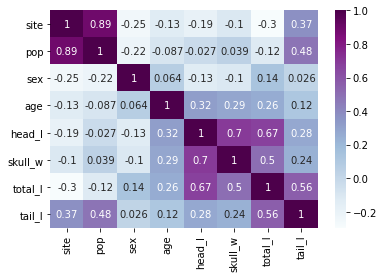

In [40]:
sns.heatmap(possums.corr(), annot = True, cmap = "BuPu")

In [54]:
X3 = X[['total_l', 'tail_l', 'sex']]

In [60]:
clf2 = LogisticRegression(C = 0.01)
clf2.fit(X3, y)

LogisticRegression(C=0.01)

In [61]:
clf2.score(X3, y)

0.8137254901960784

In [62]:
logit = Logit(y, X)

In [63]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_val_score(clf2, X3, y, cv = 10)

array([0.63636364, 0.72727273, 0.9       , 0.9       , 0.8       ,
       1.        , 0.9       , 0.7       , 0.6       , 0.7       ])

In [66]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2)

In [73]:
clf2.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [74]:
clf2.score(X_test, y_test)

0.6190476190476191

In [75]:
clf2.score(X_train, y_train)

0.7407407407407407

### PCA

In [76]:
!pwd

/Users/jacobkoehler/Desktop/now/emeritus/ml_ohours_july/jacob_office_hours/data


In [77]:
!cd ../../

In [78]:
!pwd

/Users/jacobkoehler/Desktop/now/emeritus/ml_ohours_july/jacob_office_hours/data
